In [2]:
import pickle 
import joblib
import json
import numpy as np
import base64
import cv2
import pywt
import joblib
import matplotlib.pyplot as plt

In [3]:
global __model
global __class_number_to_name
with open('saved_model.pkl', 'rb') as f:
     __model = joblib.load(f)

In [4]:
with open("class_dictionary.json", "r") as f:
        class_name_to_number = json.load(f)
        __class_number_to_name = {v:k for k,v in class_name_to_number.items()}

In [6]:
face_cascade = cv2.CascadeClassifier('opencv/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('opencv/haarcascade_eye.xml')

In [16]:
def crop_img_2eye(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,255),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >=2:
            return roi_color
            

In [12]:
def w2d(img, mode='haar', level=1):
    imArray = img

    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;

    coeffs=pywt.wavedec2(imArray, mode, level=level)


    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [13]:
def predict(path):
    img = crop_img_2eye(path)
    scalled_raw_img = cv2.resize(img, (32, 32))
    img_har = w2d(img,'db1',5)
    scalled_img_har = cv2.resize(img_har, (32, 32))
    test_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
    return __class_number_to_name[__model.predict(test_img.reshape(1,-1))[0]]

Test image is,


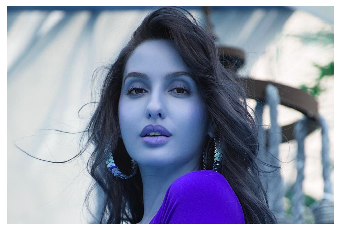

Predicted Person is : Nora


Test image is,


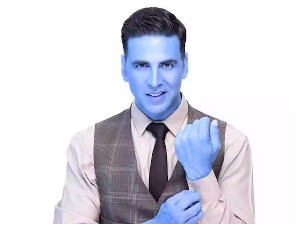

Predicted Person is : Akshay


Test image is,


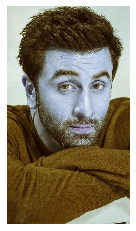

Predicted Person is : Ranbir


Test image is,


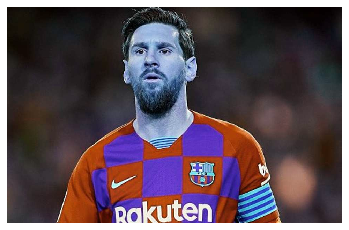

Predicted Person is : messi


Test image is,


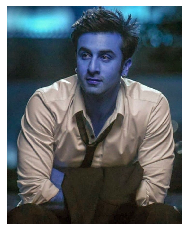

Predicted Person is : Ranbir


Test image is,


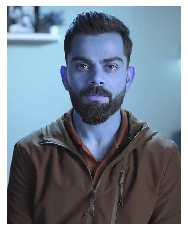

Predicted Person is : kohli


Test image is,


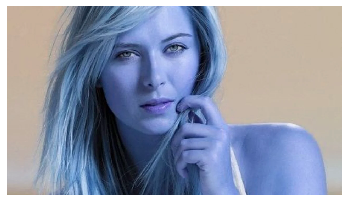

Predicted Person is : m_Sharapova


Test image is,


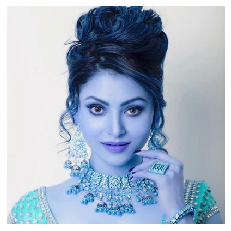

Predicted Person is : Urvashi


Test image is,


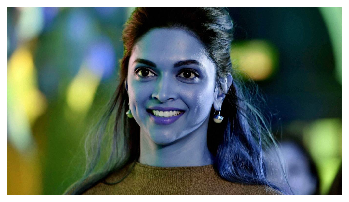

Predicted Person is : Depika




In [65]:
import os
data = os.listdir('test/')
for test_img in data:
    print('Test image is,')
    img = cv2.imread('test/'+test_img)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    try:
        pred = predict('test/'+test_img)
        print('Predicted Person is : {}'.format(pred))
    except:
        print('Image isn\'t clear')
    print()
    print()
    
    